## Setup and Data Loading

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Set global matplotlib settings

plt.rcParams.update({
    'figure.dpi': 100,           
    'font.size': 14,             
    'axes.titlesize': 16,        
    'axes.labelsize': 14,        
    'xtick.labelsize': 12,       
    'ytick.labelsize': 12,       
    'figure.figsize': (10, 6),   
    'axes.labelpad': 10,         
    'axes.titlepad': 15,         
})

# Set plot style and ensure plots display in notebook

plt.style.use('ggplot')
%matplotlib inline


In [66]:
# Load the Kaggle dataset

train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

## EDA

In [91]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


<h2 style="font-size: 22px" >
Column Types Overview
</h2>
<p>
The dataset has 81 columns, categorized into numeric (`int64`, `float64`) and categorical (`object`) types.
<br>
Below, we summarize the count and a sample of each type. To view the data type of each column, you can use:
<br>
<code>pd.set_option('display.max_rows', None)</code>
<br>
<code>print(train_data.dtypes)</code>
<br>
<code>pd.reset_option('display.max_rows')</code> .
</p>

In [117]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("\nColumn summary:")
print(f"Total columns: {len(train_data.columns)}")
print(f"Numeric columns ({len(numeric_cols)}): {', '.join(numeric_cols[:5])} ...")
print(f"Categorical columns ({len(categorical_cols)}): {', '.join(categorical_cols[:5])} ...")


Column summary:
Total columns: 81
Numeric columns (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual ...
Categorical columns (43): MSZoning, Street, Alley, LotShape, LandContour ...


<h1 style= "font-size: 22px">
Sample Data Overview
</h2>
<p>
The dataset contains 81 columns, which is too many to display fully in a single output.
<br>
Below, we show the a random sample of 5 rows with the default pandas display settings, which truncates some columns with `...`.
<br>
To view all columns, you can use:
<br>
<code>pd.set_option('display.max_columns', None)</code>
<br>
<code>print("\nA sample of rows of train data:")</code>
<br>
<code>display(train_data.sample(5 , random_state=1))</code>
<br>
<code>pd.reset_option('display.max_columns')</code> .
</p>

In [118]:
print("\nA sample of rows of train data:")
train_data.sample(5 , random_state=1)


A sample of rows of train data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
258,259,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
288,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
1233,1234,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,142000


In [94]:
# Show only columns with missing values
missing_values = train_data.isnull().sum()
print("\nColumns with missing values:\n", missing_values[missing_values > 0])


Columns with missing values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [97]:
# Basic statistics of SalePrice
print("\nBasic statistics of SalePrice:\n", train_data['SalePrice'].describe())


Basic statistics of SalePrice:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


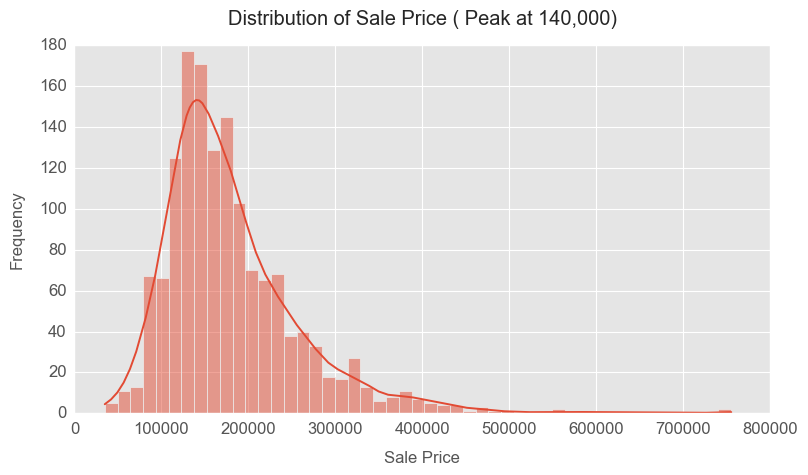

In [99]:
# Visualize distribution of SalePrice

plt.figure(figsize=(8, 4))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price ( Peak at 140,000)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()